In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [57]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [58]:
classes = ['airplane','automobile','bird','cat','dear','dog','frog','horse','ship','truck']

In [59]:
def plot_figure(X,y,index):
    plt.figure(figsize =(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

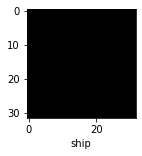

In [65]:
plot_figure(X_train,y_train,8)

In [69]:
X_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [5]:
X_train = X_train/255
X_test = X_test/255
X_train[0][0]

array([[0.23137255, 0.24313725, 0.24705882],
       [0.16862745, 0.18039216, 0.17647059],
       [0.19607843, 0.18823529, 0.16862745],
       [0.26666667, 0.21176471, 0.16470588],
       [0.38431373, 0.28627451, 0.20392157],
       [0.46666667, 0.35686275, 0.24705882],
       [0.54509804, 0.41960784, 0.29411765],
       [0.56862745, 0.43137255, 0.31372549],
       [0.58431373, 0.45882353, 0.34901961],
       [0.58431373, 0.47058824, 0.36470588],
       [0.51372549, 0.40392157, 0.30196078],
       [0.49019608, 0.38823529, 0.29803922],
       [0.55686275, 0.45098039, 0.35686275],
       [0.56470588, 0.43921569, 0.3372549 ],
       [0.5372549 , 0.41176471, 0.30980392],
       [0.50588235, 0.38039216, 0.27843137],
       [0.5372549 , 0.41568627, 0.30980392],
       [0.5254902 , 0.41568627, 0.29803922],
       [0.48627451, 0.38039216, 0.25098039],
       [0.54509804, 0.44313725, 0.30588235],
       [0.54509804, 0.43921569, 0.29411765],
       [0.52156863, 0.41176471, 0.27058824],
       [0.

In [71]:
from tensorflow import keras
    
model = keras.Sequential([keras.layers.Flatten(input_shape = (32,32,3)),
                        keras.layers.Dense(1000,activation = 'relu'),
                        keras.layers.Dense(10,activation = 'sigmoid')
                         ])
    
model.compile(optimizer='SGD',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

1563/1563 [==============================] - 31s 19ms/step - loss: 1.8495 - accuracy: 0.34130s - loss: 1.8


In [73]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.7639 - accuracy: 0.3748


[1.7638750076293945, 0.3747999966144562]

In [87]:
from sklearn.metrics import confusion_matrix,classification_report
y_p = model.predict(X_test)
y_p.shape

(10000, 10)

In [91]:
yp = [np.argmax(element) for element in y_p]
yp[:3]

[3, 8, 8]

In [94]:
cm = confusion_matrix(y_test,yp)
cm

array([[431,  31,  83,   6, 145,   9,  13,  90, 182,  10],
       [ 78, 427,  25,  18,  85,  45,  27,  86, 120,  89],
       [ 89,  20, 204,  28, 435,  59,  43,  81,  30,  11],
       [ 18,  50, 109, 151, 265, 179,  41, 133,  29,  25],
       [ 42,  14,  63,  12, 652,  31,  50, 106,  27,   3],
       [ 17,  21,  98,  99, 292, 283,  34, 110,  38,   8],
       [  5,  25,  73,  29, 431,  69, 258,  78,  21,  11],
       [ 22,  30,  43,  32, 270,  39,  14, 503,  23,  24],
       [145,  63,  19,  10,  88,  27,   4,  54, 546,  44],
       [ 74, 164,  23,  19,  70,  25,  28, 164, 140, 293]], dtype=int64)

In [96]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.47      0.43      0.45      1000
           1       0.51      0.43      0.46      1000
           2       0.28      0.20      0.23      1000
           3       0.37      0.15      0.22      1000
           4       0.24      0.65      0.35      1000
           5       0.37      0.28      0.32      1000
           6       0.50      0.26      0.34      1000
           7       0.36      0.50      0.42      1000
           8       0.47      0.55      0.51      1000
           9       0.57      0.29      0.39      1000

    accuracy                           0.37     10000
   macro avg       0.41      0.37      0.37     10000
weighted avg       0.41      0.37      0.37     10000



In [108]:
model_cnn = models.Sequential([
                    layers.Conv2D(filters =32,kernel_size = (3,3),activation = 'relu',input_shape = (32,32,3)),
                    layers.MaxPooling2D((2,2)),
                    layers.Conv2D(filters =64,kernel_size = (3,3),activation = 'relu'),
                    layers.MaxPooling2D((2,2)),
                    layers.Flatten(),
                    layers.Dense(64,activation = 'relu'),
                    layers.Dense(10,activation = 'softmax')])
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])  
model_cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 45s 28ms/step - loss: 1.5008 - accuracy: 0.4573
Epoch 2/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1384 - accuracy: 0.5973
Epoch 3/5
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9976 - accuracy: 0.6517
Epoch 4/5
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9070 - accuracy: 0.6835
Epoch 5/5
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8373 - accuracy: 0.7089


In [109]:
model_cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9537 - accuracy: 0.6735


[0.9537343978881836, 0.6735000014305115]

In [112]:
y_test = y_test.reshape(-1,)

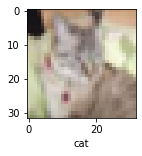

In [123]:
plot_figure(X_test,y_test,8)

In [117]:
y_p = model_cnn(X_test)
y_p[:5]

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[8.7206103e-03, 6.5100589e-03, 1.0807427e-02, 7.0935804e-01,
        9.8212610e-04, 1.3765997e-01, 5.6220684e-02, 1.4414478e-03,
        5.3118356e-02, 1.5181264e-02],
       [6.2374435e-03, 9.4723783e-02, 4.6561956e-05, 1.5753907e-05,
        1.0703669e-06, 1.2768023e-06, 3.1727763e-05, 2.0261236e-07,
        8.8446581e-01, 1.4476383e-02],
       [6.1710466e-02, 3.3344907e-01, 2.6664387e-03, 6.6822222e-03,
        1.5440378e-03, 1.5788382e-03, 6.7720343e-03, 1.7278318e-03,
        1.8247761e-01, 4.0139151e-01],
       [5.2470583e-01, 1.5393084e-01, 5.2005410e-02, 8.9861650e-04,
        2.2553341e-03, 1.3808068e-04, 2.1673327e-02, 5.8143534e-05,
        2.3548190e-01, 8.8524641e-03],
       [1.4306232e-04, 5.9655478e-04, 4.4518173e-02, 4.4143640e-02,
        2.5763625e-01, 8.0500469e-03, 6.4324659e-01, 2.6669991e-04,
        1.3044254e-03, 9.4439551e-05]], dtype=float32)>

In [119]:
yp = [np.argmax(element) for element in y_p]
yp[:5]

[3, 8, 9, 0, 6]

In [121]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [126]:
classes[yp[8]]

'cat'

In [128]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1000
           1       0.80      0.75      0.78      1000
           2       0.66      0.44      0.53      1000
           3       0.58      0.39      0.47      1000
           4       0.59      0.60      0.60      1000
           5       0.58      0.63      0.61      1000
           6       0.64      0.86      0.73      1000
           7       0.72      0.72      0.72      1000
           8       0.82      0.77      0.79      1000
           9       0.64      0.85      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [6]:
(X_train,y_train),(X_test,y_test) = datasets.mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
X_train = X_train/255
X_test = X_test/255
X_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
model_cnn = models.Sequential([
                    layers.Conv1D(filters =28,kernel_size = 3,activation = 'relu',input_shape = (28,28)),
                    layers.MaxPooling1D(2),
                    layers.Conv1D(filters =56,kernel_size = 3,activation = 'relu'),
                    layers.MaxPooling1D(2),
                    layers.Flatten(),
                    layers.Dense(25,activation = 'relu'),
                    layers.Dense(10,activation = 'softmax')])
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])  
model_cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.9850 - accuracy: 0.6734
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4523 - accuracy: 0.8649
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3141 - accuracy: 0.9059
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2470 - accuracy: 0.9253
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2052 - accuracy: 0.9382


In [15]:
model_cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1698 - accuracy: 0.9505


[0.16980692744255066, 0.9505000114440918]

In [18]:
y_p = model_cnn.predict(X_test)

In [20]:
yp = [np.argmax(element) for element in y_p]
yp[:5]

[7, 2, 1, 0, 4]

In [22]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       980
           1       0.97      0.98      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.93      0.94      0.94      1010
           4       0.95      0.97      0.96       982
           5       0.93      0.92      0.93       892
           6       0.98      0.94      0.96       958
           7       0.98      0.93      0.95      1028
           8       0.94      0.95      0.94       974
           9       0.94      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

